# **Clustering Online Retail Data**

The code below is taken from Manish Kumar's submission on [kaggle.com](https://www.kaggle.com/hellbuoy/online-retail-k-means-hierarchical-clustering/notebook).

You are encouraged to go to the link above and check the full code. In this lab, you will do the necessary steps to explore the data and prepare it for sklearn algorithms.

**About the data set**

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Using K-Means Clustering, you can segement the Customers based on RFM so that the company can target its customers efficiently.

**Import libraries**

In [22]:
# import required libraries for dataframe and visualization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import datetime as dt

# import required sklearn libraries for KMeans Clustering
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Acquire data

In [23]:
# Read in the data using panda's read_csv method
retail = pd.read_csv('UnsupervisedLearning/OnlineRetail/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)

#TODO: Write code to inspect the first five rows of the data frame
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom


# Inspect data

In [24]:
#TODO: Write code to inspect the shape of the data frame
retail.shape

(2500, 8)

In [25]:
#TODO: Write code to display information about the data frame
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
2495,536592,20761,BLUE PAISLEY SKETCHBOOK,1,01-12-2010 17:06,7.62,NaN,United Kingdom
2496,536592,20780,BLACK EAR MUFF HEADPHONES,1,01-12-2010 17:06,11.02,NaN,United Kingdom
2497,536592,20846,ZINC HEART LATTICE T-LIGHT HOLDER,1,01-12-2010 17:06,2.51,NaN,United Kingdom
2498,536592,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,1,01-12-2010 17:06,5.91,NaN,United Kingdom


In [26]:
#TODO: Write code to display statistics about the data frame
retail.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,2500,2500,2490,2500.000000,2500,2500.000000,1919.000000,2500
unique,138,1175,1167,NaN,117,NaN,NaN,7
top,536544,22632,HAND WARMER SCOTTY DOG DESIGN,NaN,01-12-2010 14:32,NaN,NaN,United Kingdom
freq,527,19,18,NaN,528,NaN,NaN,2341
mean,NaN,NaN,NaN,10.065200,NaN,3.701044,15637.112559,NaN
std,NaN,NaN,NaN,29.139317,NaN,12.328907,1848.418705,NaN
min,NaN,NaN,NaN,-24.000000,NaN,0.000000,12431.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,14307.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.510000,15605.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.210000,17841.000000,NaN


# Clean data

**Correcting**

In [27]:
#TODO: Write code to drop rows having missing values
retail.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
2456,536591,22121,NOEL WOODEN BLOCK LETTERS,2,01-12-2010 16:58,5.95,14606.0,United Kingdom
2457,536591,21488,RED WHITE SCARF HOT WATER BOTTLE,1,01-12-2010 16:58,3.95,14606.0,United Kingdom
2458,536591,21484,CHICK GREY HOT WATER BOTTLE,2,01-12-2010 16:58,3.45,14606.0,United Kingdom
2459,536591,22357,KINGS CHOICE BISCUIT TIN,1,01-12-2010 16:58,4.25,14606.0,United Kingdom


In [28]:
# Changing the datatype of Customer Id to a string as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

**Creating**

We are going to analysis the Customers based on 3 factors:
* R (Recency): Number of days since last purchase
* F (Frequency): Number of transactions
* M (Monetary): Total amount of transactions (revenue contributed)

In [29]:
# Create a new attribute : Monetary based on Quantity and UnitPrice

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()

#TODO: Write code to inspect the first five rows of rfm_m
rfm_m.head()

,CustomerID,Amount
0,12431.0,358.25
1,12433.0,1919.14
2,12472.0,-122.30
3,12583.0,855.86
4,12662.0,261.48


In [30]:
# Create a new attribute : Frequency based on invoice count per customer ID

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']

#TODO: Write code to inspect the first five rows of rfm_f
rfm_f.head()

,CustomerID,Frequency
0,12431.0,14
1,12433.0,73
2,12472.0,14
3,12583.0,20
4,12662.0,15


In [31]:
# Merge the two data frames

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

#TODO: Write code to inspect the first five rows of rfm
rfm.head()

,CustomerID,Amount,Frequency
0,12431.0,358.25,14
1,12433.0,1919.14,73
2,12472.0,-122.30,14
3,12583.0,855.86,20
4,12662.0,261.48,15


In [32]:
# Create a new attribute : Recency
# -----------------------------------

# Convert to datetime to proper datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

# Compute the maximum date to know the last transaction date
max_date = max(retail['InvoiceDate'])

# Compute the difference between max date and transaction date
retail['Diff'] = max_date - retail['InvoiceDate']

# Compute last transaction date to get the recency of customers
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()

# Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days

# Merge tha dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

#TODO: Write code to inspect the first five rows of the data frame
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12431.0,358.25,14,0
1,12433.0,1919.14,73,0
2,12472.0,-122.30,14,0
3,12583.0,855.86,20,0
4,12662.0,261.48,15,0


**Remove outliers**

Text(0.5, 0, 'Attributes')

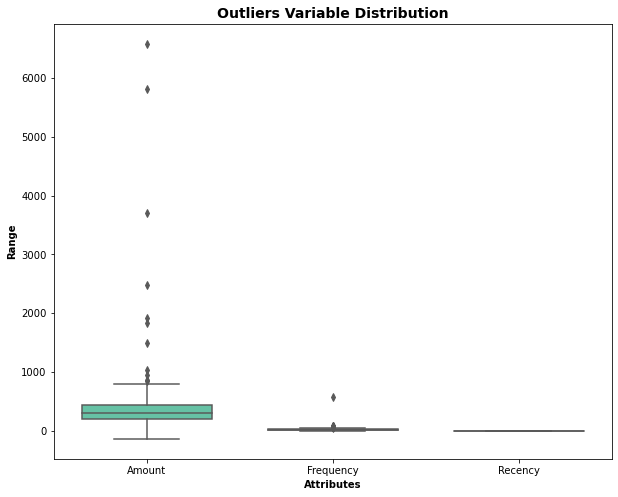

In [33]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [34]:
# Remove outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

#TODO: Write code to remove outliers for Recency

# Remove outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

**Rescale attributes**

In [40]:
# Rescaling the attributes using a MinMaxScaler

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = MinMaxScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,0.130016,0.154762,0.0
1,0.536117,0.857143,0.0
2,0.004990,0.154762,0.0
3,0.259481,0.226190,0.0
4,0.104839,0.166667,0.0


# Earn Your Wings

Implement a K-Means Clustering algorithm on the cleaned data set. Use the elbow method to find the right value of k to use.
Add comments in your code to explain each step that you take in your implementation.

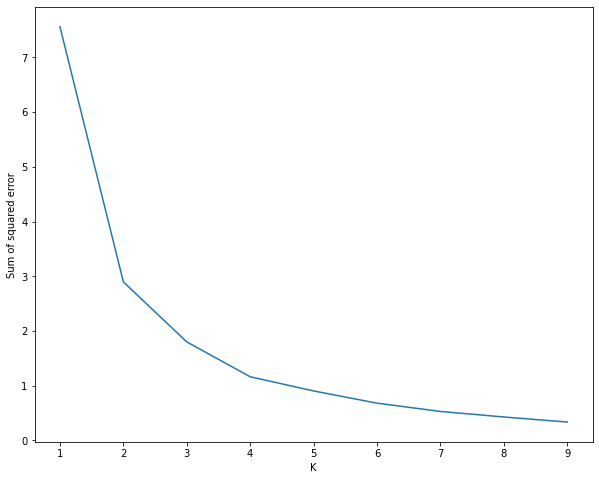

In [43]:
#drop Recency
rfm_df_scaled.drop('Recency', axis=1)

# Define a range for possible k values. In this example, we choose 1 to 10
k_rng = range(1,10)

# Declare an array to store the values from the sum of squared error values.
sse = []

# Using a for loop, go through each value in the k range and compute the sse value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(rfm_df_scaled[['Amount','Frequency','Recency']])
    sse.append(km.inertia_)

# Plot the sse value for each k.
# Notice that 3 is the elbow value.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


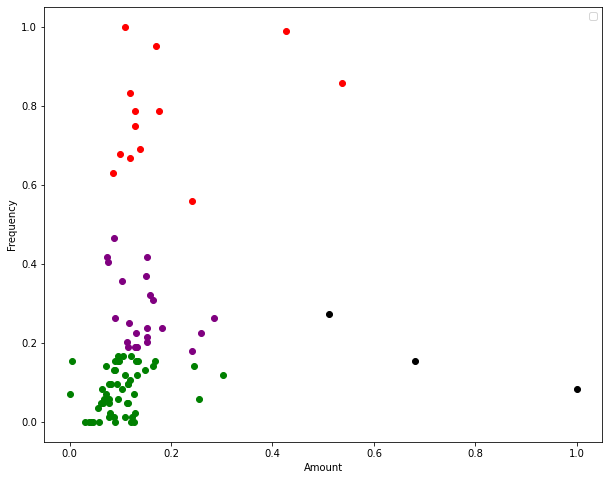

In [47]:
# Define a KMeans object with 3 as the value of k. Call the object km
km = KMeans(n_clusters=4)

# Predict the data set excluding the name column. 
# Save the prediction in an array and call it y_predicted

y_predicted = km.fit_predict(rfm_df_scaled[['Amount','Frequency']])
# Add a column to the data frame to store the predicted cluster ID of each element
rfm_df_scaled['cluster'] = y_predicted

df1 = rfm_df_scaled[rfm_df_scaled.cluster==0]
df2 = rfm_df_scaled[rfm_df_scaled.cluster==1]
df3 = rfm_df_scaled[rfm_df_scaled.cluster==2]
df4 = rfm_df_scaled[rfm_df_scaled.cluster==3]

# Plot the data frames with different colors to differentiate them
plt.scatter(df1.Amount,df1['Frequency'],color='green')
plt.scatter(df2.Amount,df2['Frequency'],color='red')
plt.scatter(df3.Amount,df3['Frequency'],color='black')
plt.scatter(df4.Amount,df4['Frequency'],color='purple')

# Define the labels on the x and y axes
plt.xlabel('Amount')
plt.ylabel('Frequency')

# Plot the legend
plt.legend()

